In [18]:
import tensorflow as tf
from models import classifier
import pandas as pd
import pathlib
from hyperparameters import *
from constants import *
from utils import data_loading
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [19]:
apes_info = pd.read_csv(APES_INFO_FILEPATH)
all_images_ids, train_ids, validation_ids, test_ids = data_loading.get_image_ids(apes_info, pathlib.Path(DATA_FILEPATH))

In [20]:
dataset = data_loading.load_full_dataset(DATA_FILEPATH, IMAGE_SIZE, all_images_ids)

Found 10000 files belonging to 10000 classes.


In [21]:
x_train = data_loading.load_specific_dataset(dataset, train_ids, None)
x_validation = data_loading.load_specific_dataset(dataset, validation_ids, None)
x_test = data_loading.load_specific_dataset(dataset, test_ids, None)

In [22]:
_, _, _, feature_value_names = data_loading.get_feature_dataset_y(apes_info, FEATURE_NAMES)

In [23]:
train_dataset_mouth, validation_dataset_mouth, test_dataset_mouth = data_loading.prepare_feature_dataset(
    apes_info, "Mouth", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_background, validation_dataset_background, test_dataset_background = data_loading.prepare_feature_dataset(
    apes_info, "Background", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_hat, validation_dataset_hat, test_dataset_hat = data_loading.prepare_feature_dataset(
    apes_info, "Hat", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_eyes, validation_dataset_eyes, test_dataset_eyes = data_loading.prepare_feature_dataset(
    apes_info, "Eyes", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_clothes, validation_dataset_clothes, test_dataset_clothes = data_loading.prepare_feature_dataset(
    apes_info, "Clothes", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_fur, validation_dataset_fur, test_dataset_fur = data_loading.prepare_feature_dataset(
    apes_info, "Fur", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_earring, validation_dataset_earring, test_dataset_earring = data_loading.prepare_feature_dataset(
    apes_info, "Earring", x_train, x_validation, x_test, BATCH_SIZE
)

In [24]:
compile_classification_model_hyperparameters = {
    "optimizer": tf.keras.optimizers.legacy.Adam(),
    "loss": [tf.keras.losses.BinaryCrossentropy(from_logits=False)],
    "metrics": ["accuracy"],
}

In [25]:
mouth_classification_model = classifier.build_single_label_classifier(**MOUTH_CLASSIFICATION_MODEL_HYPERPARAMETERS)
mouth_classification_model.compile(**compile_classification_model_hyperparameters)
mouth_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_MOUTH_CLASSIFIER_FILEPATH, append=False)

In [26]:
mouth_classification_model.fit(
    train_dataset_mouth.repeat(STEPS_PER_EPOCH * 17),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=17,
    batch_size=None,
    validation_data=validation_dataset_mouth,
    callbacks=[mouth_csv_logger],
)
mouth_classification_model.save_weights(MODEL_MOUTH_CLASSIFIER_FILEPATH)

Epoch 1/40


2023-06-03 15:35:18.308526: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,33]
	 [[{{node Placeholder/_12}}]]
2023-06-03 15:35:18.308653: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - 15s 275ms/step - loss: 0.6495 - accuracy: 0.1283
Epoch 2/40
54/54 [==============================] - 14s 265ms/step - loss: 0.5363 - accuracy: 0.2453
Epoch 3/40
54/54 [==============================] - 14s 258ms/step - loss: 0.4225 - accuracy: 0.2549
Epoch 4/40
54/54 [==============================] - 14s 269ms/step - loss: 0.3238 - accuracy: 0.2794
Epoch 5/40
54/54 [==============================] - 14s 259ms/step - loss: 0.2517 - accuracy: 0.3209
Epoch 6/40
54/54 [==============================] - 14s 259ms/step - loss: 0.2012 - accuracy: 0.3696
Epoch 7/40
54/54 [==============================] - 14s 258ms/step - loss: 0.1680 - accuracy: 0.3813
Epoch 8/40
54/54 [==============================] - 14s 261ms/step - loss: 0.1455 - accuracy: 0.3942
Epoch 9/40
54/54 [==============================] - 14s 260ms/step - loss: 0.1310 - accuracy: 0.4366
Epoch 10/40
54/54 [==============================] - 14s 259ms/step - loss: 0.1199 - accuracy: 0.4531


In [27]:
background_classification_model = classifier.build_single_label_classifier(
    **BACKGROUND_CLASSIFICATION_MODEL_HYPERPARAMETERS
)
background_classification_model.compile(**compile_classification_model_hyperparameters)
background_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_BACKGROUND_CLASSIFIER_FILEPATH, append=False)

In [28]:
background_classification_model.fit(
    train_dataset_background.repeat(STEPS_PER_EPOCH * 6),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=6,
    batch_size=None,
    validation_data=validation_dataset_background,
    callbacks=[background_csv_logger],
)
background_classification_model.save_weights(MODEL_BACKGROUND_CLASSIFIER_FILEPATH)

Epoch 1/20


2023-06-03 15:44:52.608668: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 15:44:52.608795: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


54/54 [==============================] - 15s 271ms/step - loss: 0.5506 - accuracy: 0.2500
Epoch 2/20
54/54 [==============================] - 14s 269ms/step - loss: 0.4025 - accuracy: 0.3820
Epoch 3/20
54/54 [==============================] - 14s 267ms/step - loss: 0.3414 - accuracy: 0.5565
Epoch 4/20
54/54 [==============================] - 14s 265ms/step - loss: 0.2991 - accuracy: 0.6882
Epoch 5/20
54/54 [==============================] - 14s 267ms/step - loss: 0.2617 - accuracy: 0.7008
Epoch 6/20
54/54 [==============================] - 14s 264ms/step - loss: 0.2347 - accuracy: 0.7382
Epoch 7/20
54/54 [==============================] - 14s 258ms/step - loss: 0.2166 - accuracy: 0.7953
Epoch 8/20
54/54 [==============================] - 14s 268ms/step - loss: 0.1987 - accuracy: 0.8130
Epoch 9/20
54/54 [==============================] - 14s 267ms/step - loss: 0.1824 - accuracy: 0.8015
Epoch 10/20
54/54 [==============================] - 14s 265ms/step - loss: 0.1663 - accuracy: 0.7875


In [29]:
hat_classification_model = classifier.build_single_label_classifier(**HAT_CLASSIFICATION_MODEL_HYPERPARAMETERS)
hat_classification_model.compile(**compile_classification_model_hyperparameters)
hat_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_HAT_CLASSIFIER_FILEPATH, append=False)

In [30]:
hat_classification_model.fit(
    train_dataset_hat.repeat(STEPS_PER_EPOCH * 15),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=15,
    batch_size=None,
    validation_data=validation_dataset_hat,
    callbacks=[hat_csv_logger],
)
hat_classification_model.save_weights(MODEL_HAT_CLASSIFIER_FILEPATH)

Epoch 1/40


2023-06-03 15:49:38.489057: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,37]
	 [[{{node Placeholder/_12}}]]
2023-06-03 15:49:38.489185: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,37]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - 15s 276ms/step - loss: 0.4383 - accuracy: 0.0758
Epoch 2/40
54/54 [==============================] - 15s 288ms/step - loss: 0.1651 - accuracy: 0.2475
Epoch 3/40
54/54 [==============================] - 17s 313ms/step - loss: 0.1197 - accuracy: 0.2912
Epoch 4/40
54/54 [==============================] - 15s 276ms/step - loss: 0.1062 - accuracy: 0.3129
Epoch 5/40
54/54 [==============================] - 15s 278ms/step - loss: 0.0970 - accuracy: 0.3340
Epoch 6/40
54/54 [==============================] - 15s 275ms/step - loss: 0.0902 - accuracy: 0.3685
Epoch 7/40
54/54 [==============================] - 15s 273ms/step - loss: 0.0863 - accuracy: 0.4143
Epoch 8/40
54/54 [==============================] - 15s 271ms/step - loss: 0.0816 - accuracy: 0.4489
Epoch 9/40
54/54 [==============================] - 15s 271ms/step - loss: 0.0792 - accuracy: 0.4527
Epoch 10/40
54/54 [==============================] - 15s 271ms/step - loss: 0.0758 - accuracy: 0.4710


In [31]:
eyes_classification_model = classifier.build_single_label_classifier(**EYES_CLASSIFICATION_MODEL_HYPERPARAMETERS)
eyes_classification_model.compile(**compile_classification_model_hyperparameters)
eyes_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_EYES_CLASSIFIER_FILEPATH, append=False)

In [32]:
eyes_classification_model.fit(
    train_dataset_eyes.repeat(STEPS_PER_EPOCH * 10),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=10,
    batch_size=None,
    validation_data=validation_dataset_eyes,
    callbacks=[eyes_csv_logger],
)
eyes_classification_model.save_weights(MODEL_EYES_CLASSIFIER_FILEPATH)

Epoch 1/30


2023-06-03 15:59:52.479915: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,23]
	 [[{{node Placeholder/_12}}]]
2023-06-03 15:59:52.480045: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


54/54 [==============================] - 16s 288ms/step - loss: 0.4860 - accuracy: 0.1652
Epoch 2/30
54/54 [==============================] - 15s 279ms/step - loss: 0.1995 - accuracy: 0.2944
Epoch 3/30
54/54 [==============================] - 15s 283ms/step - loss: 0.1449 - accuracy: 0.3877
Epoch 4/30
54/54 [==============================] - 15s 275ms/step - loss: 0.1256 - accuracy: 0.4886
Epoch 5/30
54/54 [==============================] - 15s 274ms/step - loss: 0.1135 - accuracy: 0.5598
Epoch 6/30
54/54 [==============================] - 15s 271ms/step - loss: 0.1049 - accuracy: 0.6035
Epoch 7/30
54/54 [==============================] - 15s 274ms/step - loss: 0.0979 - accuracy: 0.6380
Epoch 8/30
54/54 [==============================] - 16s 294ms/step - loss: 0.0915 - accuracy: 0.6679
Epoch 9/30
54/54 [==============================] - 15s 280ms/step - loss: 0.0877 - accuracy: 0.6876
Epoch 10/30
54/54 [==============================] - 15s 277ms/step - loss: 0.0836 - accuracy: 0.7017


In [33]:
clothes_classification_model = classifier.build_single_label_classifier(**CLOTHES_CLASSIFICATION_MODEL_HYPERPARAMETERS)
clothes_classification_model.compile(**compile_classification_model_hyperparameters)
clothes_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_CLOTHES_CLASSIFIER_FILEPATH, append=False)

In [34]:
clothes_classification_model.fit(
    train_dataset_clothes.repeat(STEPS_PER_EPOCH * 13),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=13,
    batch_size=None,
    validation_data=validation_dataset_clothes,
    callbacks=[clothes_csv_logger],
)
clothes_classification_model.save_weights(MODEL_CLOTHES_CLASSIFIER_FILEPATH)

Epoch 1/30


2023-06-03 16:07:35.301585: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 16:07:35.301724: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - 17s 311ms/step - loss: 0.4699 - accuracy: 0.0829
Epoch 2/30
54/54 [==============================] - 17s 323ms/step - loss: 0.1665 - accuracy: 0.2045
Epoch 3/30
54/54 [==============================] - 15s 281ms/step - loss: 0.1117 - accuracy: 0.2263
Epoch 4/30
54/54 [==============================] - 15s 275ms/step - loss: 0.0979 - accuracy: 0.2640
Epoch 5/30
54/54 [==============================] - 16s 297ms/step - loss: 0.0910 - accuracy: 0.2846
Epoch 6/30
54/54 [==============================] - 17s 307ms/step - loss: 0.0854 - accuracy: 0.3114
Epoch 7/30
54/54 [==============================] - 15s 274ms/step - loss: 0.0813 - accuracy: 0.3213
Epoch 8/30
54/54 [==============================] - 16s 305ms/step - loss: 0.0782 - accuracy: 0.3395
Epoch 9/30
54/54 [==============================] - 15s 281ms/step - loss: 0.0756 - accuracy: 0.3549
Epoch 10/30
54/54 [==============================] - 16s 294ms/step - loss: 0.0731 - accuracy: 0.3805


In [35]:
fur_classification_model = classifier.build_single_label_classifier(**FUR_CLASSIFICATION_MODEL_HYPERPARAMETERS)
fur_classification_model.compile(**compile_classification_model_hyperparameters)
fur_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_FUR_CLASSIFIER_FILEPATH, append=False)

In [36]:
fur_classification_model.fit(
    train_dataset_fur.repeat(STEPS_PER_EPOCH * 12),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=12,
    batch_size=None,
    validation_data=validation_dataset_fur,
    callbacks=[fur_csv_logger],
)
fur_classification_model.save_weights(MODEL_FUR_CLASSIFIER_FILEPATH)

Epoch 1/20


2023-06-03 16:15:25.651209: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,19]
	 [[{{node Placeholder/_12}}]]
2023-06-03 16:15:25.651346: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - 16s 297ms/step - loss: 0.4420 - accuracy: 0.1690
Epoch 2/20
54/54 [==============================] - 17s 314ms/step - loss: 0.2093 - accuracy: 0.4107
Epoch 3/20
54/54 [==============================] - 16s 299ms/step - loss: 0.1582 - accuracy: 0.5138
Epoch 4/20
54/54 [==============================] - 16s 296ms/step - loss: 0.1356 - accuracy: 0.5706
Epoch 5/20
54/54 [==============================] - 16s 297ms/step - loss: 0.1200 - accuracy: 0.6022
Epoch 6/20
54/54 [==============================] - 16s 292ms/step - loss: 0.1104 - accuracy: 0.6330
Epoch 7/20
54/54 [==============================] - 16s 302ms/step - loss: 0.1006 - accuracy: 0.6800
Epoch 8/20
54/54 [==============================] - 14s 258ms/step - loss: 0.0957 - accuracy: 0.6997
Epoch 9/20
54/54 [==============================] - 15s 271ms/step - loss: 0.0894 - accuracy: 0.7192
Epoch 10/20
54/54 [==============================] - 16s 288ms/step - loss: 0.0858 - accuracy: 0.7349


In [37]:
earring_classification_model = classifier.build_single_label_classifier(**EARRING_CLASSIFICATION_MODEL_HYPERPARAMETERS)
earring_classification_model.compile(**compile_classification_model_hyperparameters)
earring_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_EARRING_CLASSIFIER_FILEPATH, append=False)

In [38]:
earring_classification_model.fit(
    train_dataset_earring.repeat(STEPS_PER_EPOCH * 10),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=10,
    batch_size=None,
    validation_data=validation_dataset_earring,
    callbacks=[earring_csv_logger],
)
earring_classification_model.save_weights(MODEL_EARRING_CLASSIFIER_FILEPATH)

Epoch 1/10


2023-06-03 16:20:40.320625: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,7]
	 [[{{node Placeholder/_12}}]]
2023-06-03 16:20:40.320751: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]


54/54 [==============================] - 15s 265ms/step - loss: 0.4558 - accuracy: 0.6447
Epoch 2/10
54/54 [==============================] - 15s 274ms/step - loss: 0.1926 - accuracy: 0.8293
Epoch 3/10
54/54 [==============================] - 15s 273ms/step - loss: 0.1273 - accuracy: 0.8533
Epoch 4/10
54/54 [==============================] - 15s 282ms/step - loss: 0.1016 - accuracy: 0.8594
Epoch 5/10
54/54 [==============================] - 15s 271ms/step - loss: 0.0893 - accuracy: 0.8829
Epoch 6/10
54/54 [==============================] - 14s 255ms/step - loss: 0.0808 - accuracy: 0.8874
Epoch 7/10
54/54 [==============================] - 14s 255ms/step - loss: 0.0745 - accuracy: 0.8922
Epoch 8/10
54/54 [==============================] - 14s 253ms/step - loss: 0.0714 - accuracy: 0.8951
Epoch 9/10
54/54 [==============================] - 14s 253ms/step - loss: 0.0661 - accuracy: 0.9003
Epoch 10/10
54/54 [==============================] - 14s 253ms/step - loss: 0.0648 - accuracy: 0.8989


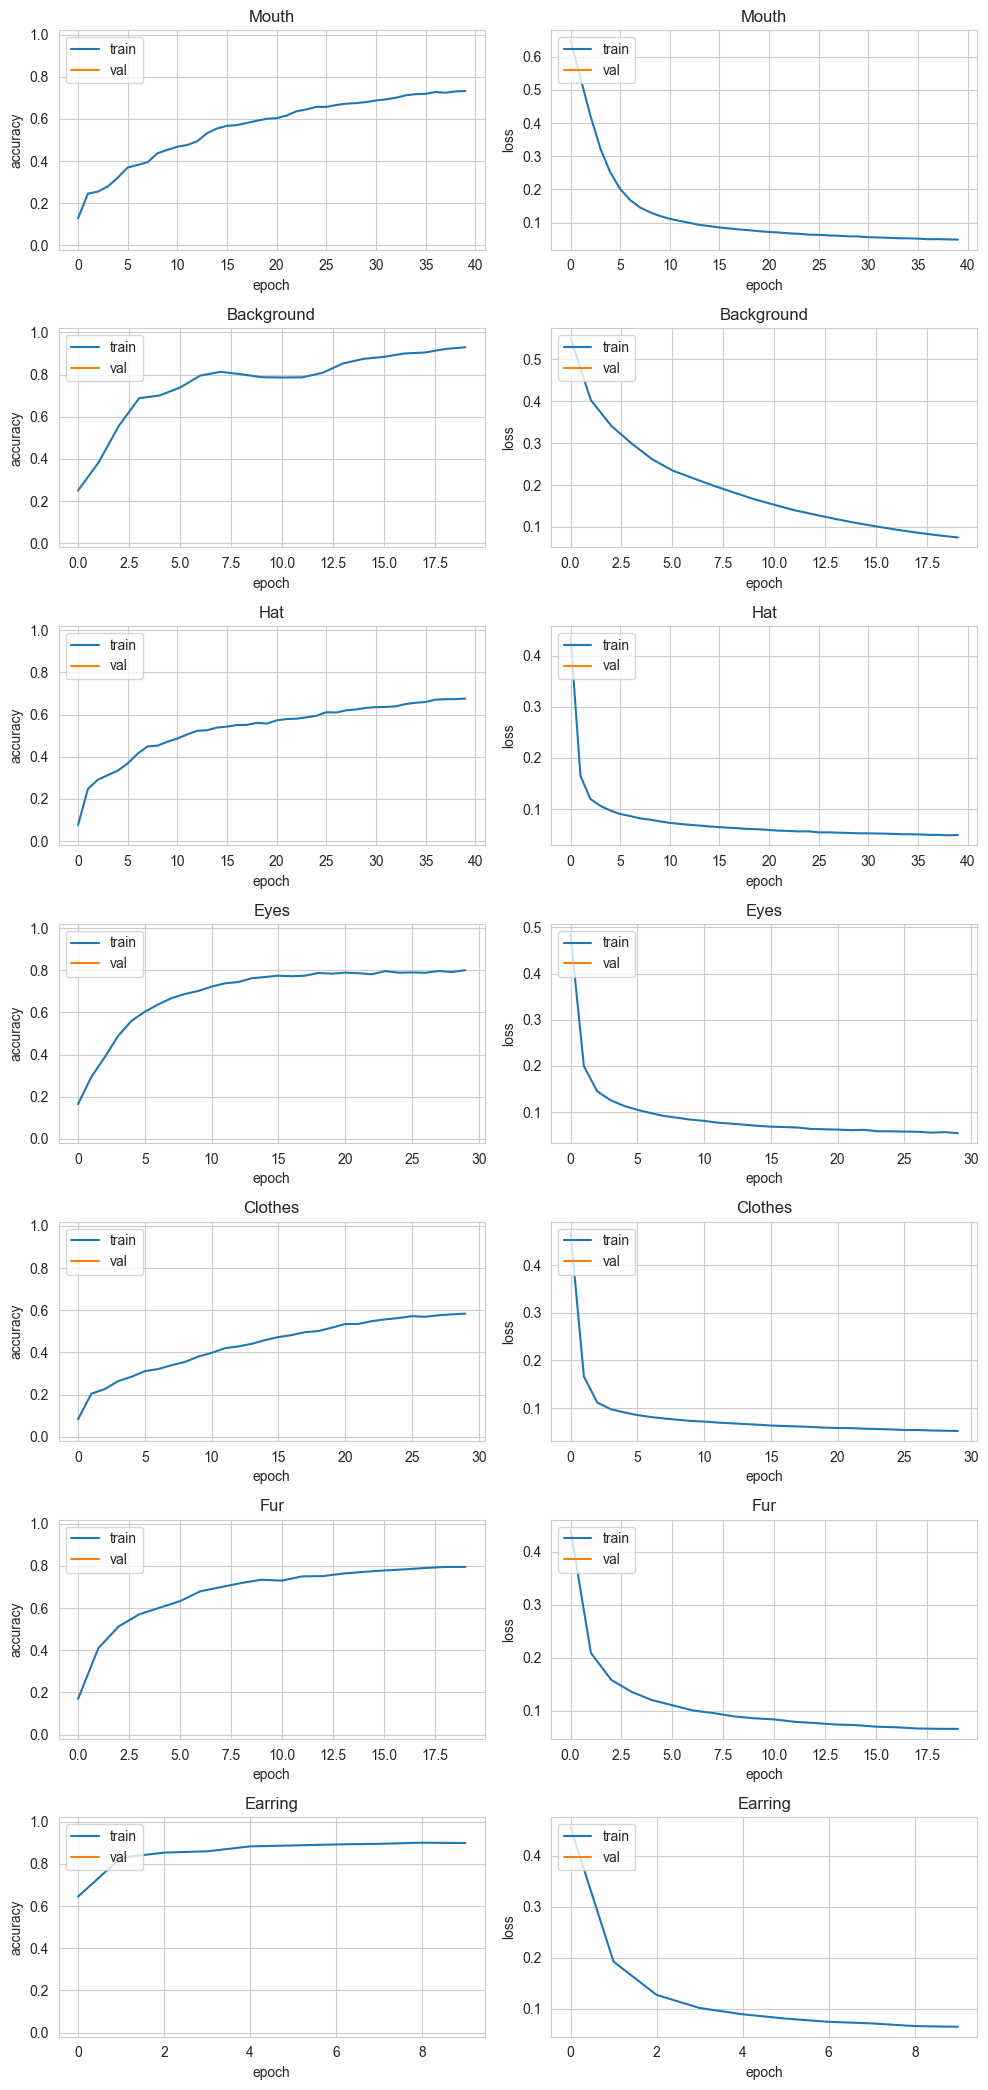

In [39]:
histories_classifiers_training = [
    pd.read_csv(HISTORY_MOUTH_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_BACKGROUND_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_HAT_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_EYES_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_CLOTHES_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_FUR_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_EARRING_CLASSIFIER_FILEPATH),
]

plt.figure(figsize=(10, len(FEATURE_NAMES) * 3))

for i, feature_name in enumerate(FEATURE_NAMES):
    plt.subplot(len(FEATURE_NAMES), 2, i * 2 + 1)
    plt.plot(histories_classifiers_training[i]["accuracy"])
    plt.plot(histories_classifiers_training[i][f"val_accuracy"])
    plt.title(feature_name)
    plt.ylim([-0.02, 1.02])
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "val"], loc="upper left")

    plt.subplot(len(FEATURE_NAMES), 2, i * 2 + 2)
    plt.plot(histories_classifiers_training[i]["loss"])
    plt.plot(histories_classifiers_training[i]["val_loss"])
    plt.title(feature_name)
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "val"], loc="upper left")

plt.tight_layout()
plt.show()

In [40]:
models = [
    mouth_classification_model,
    background_classification_model,
    hat_classification_model,
    eyes_classification_model,
    clothes_classification_model,
    fur_classification_model,
    earring_classification_model,
]

model_filepaths = [
    MODEL_MOUTH_CLASSIFIER_FILEPATH,
    MODEL_BACKGROUND_CLASSIFIER_FILEPATH,
    MODEL_HAT_CLASSIFIER_FILEPATH,
    MODEL_EYES_CLASSIFIER_FILEPATH,
    MODEL_CLOTHES_CLASSIFIER_FILEPATH,
    MODEL_FUR_CLASSIFIER_FILEPATH,
    MODEL_EARRING_CLASSIFIER_FILEPATH,
]
test_datasets = [
    test_dataset_mouth,
    test_dataset_background,
    test_dataset_hat,
    test_dataset_eyes,
    test_dataset_clothes,
    test_dataset_fur,
    test_dataset_earring,
]

In [41]:
def make_predictions(model, model_filepath, test_dataset):
    model.load_weights(model_filepath)

    return (
        model.predict(test_dataset.unbatch().batch(1)),
        list(test_dataset.unbatch().batch(1).map(lambda x, y: y)),
    )


y_test_predictions = []
y_test_true = []

for mod, mod_fp, t_ds in zip(models, model_filepaths, test_datasets):
    y_predictions, y_true = make_predictions(mod, mod_fp, t_ds)
    y_test_predictions.append(y_predictions)
    y_test_true.append(y_true)

2023-06-03 16:23:04.407891: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 16:23:04.408026: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


1500/1500 [==============================] - 14s 8ms/step


2023-06-03 16:23:18.455053: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,33]
	 [[{{node Placeholder/_12}}]]
2023-06-03 16:23:18.455180: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,33]
	 [[{{node Placeholder/_12}}]]
2023-06-03 16:23:31.672131: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape 

1500/1500 [==============================] - 14s 9ms/step


2023-06-03 16:23:46.135365: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-06-03 16:23:46.135498: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,8]
	 [[{{node Placeholder/_12}}]]
2023-06-03 16:23:59.485656: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [15

1500/1500 [==============================] - 15s 9ms/step


2023-06-03 16:24:14.680092: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 16:24:14.680228: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-06-03 16:24:30.576287: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10

1500/1500 [==============================] - 14s 9ms/step


2023-06-03 16:24:45.202371: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-06-03 16:24:45.202498: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,23]
	 [[{{node Placeholder/_12}}]]
2023-06-03 16:24:59.120700: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [

1500/1500 [==============================] - 15s 9ms/step


2023-06-03 16:25:14.307103: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,44]
	 [[{{node Placeholder/_12}}]]
2023-06-03 16:25:14.307230: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,44]
	 [[{{node Placeholder/_12}}]]
2023-06-03 16:25:28.861826: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape 

1500/1500 [==============================] - 14s 9ms/step


2023-06-03 16:25:43.085931: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,19]
	 [[{{node Placeholder/_12}}]]
2023-06-03 16:25:43.086060: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,19]
	 [[{{node Placeholder/_12}}]]
2023-06-03 16:25:57.635225: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape 

1500/1500 [==============================] - 14s 8ms/step


2023-06-03 16:26:11.426952: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-06-03 16:26:11.427079: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


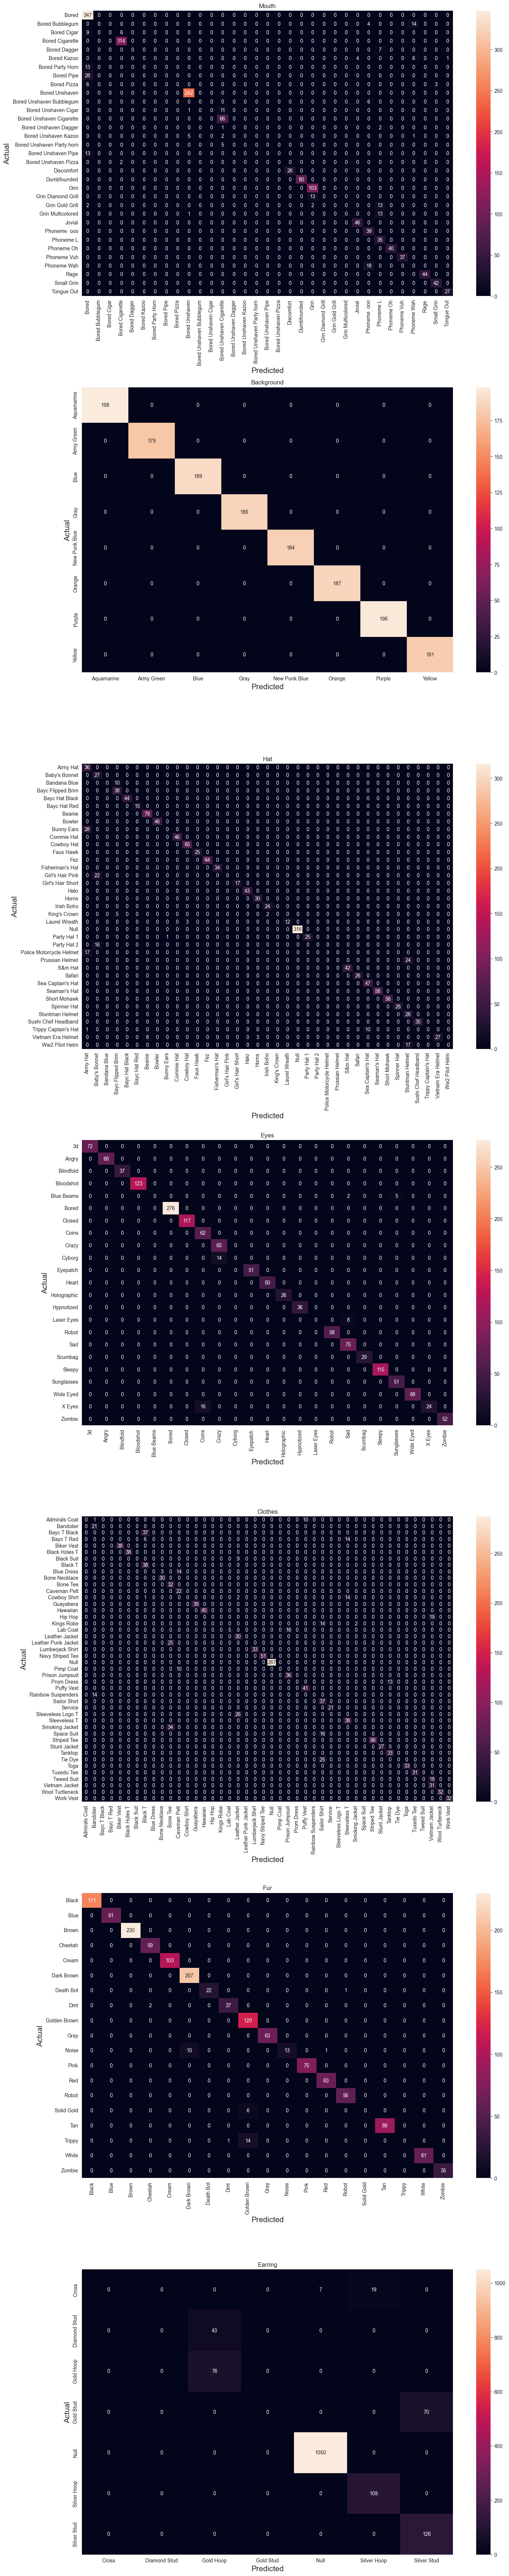

In [43]:
plt.figure(figsize=(15, len(FEATURE_NAMES) * 10))

for i, feature_name in enumerate(FEATURE_NAMES):
    cfm = confusion_matrix([np.argmax(x) for x in y_test_true[i]], [np.argmax(x) for x in y_test_predictions[i]])
    df_cfm = pd.DataFrame(cfm, index=feature_value_names[feature_name], columns=feature_value_names[feature_name])

    plt.subplot(len(FEATURE_NAMES), 1, i + 1)
    sns.heatmap(df_cfm, annot=True, fmt=".0f")
    plt.title(feature_name)
    plt.xlabel("Predicted", fontsize=15)
    plt.ylabel("Actual", fontsize=15)

plt.tight_layout()
plt.show()